# Project NLP Customer reviews

In [1]:
# Install kagglehub if not already installed
%pip install kagglehub

import kagglehub
import shutil
import os

# Download the dataset from Kaggle
path = kagglehub.dataset_download("datafiniti/consumer-reviews-of-amazon-products")

# Find the main CSV file in the downloaded dataset
csv_files = [f for f in os.listdir(path) if f.endswith('.csv')]
main_csv = csv_files[0]  # Use the first CSV file found

# Save the main CSV file to the ./dataset directory
os.makedirs("dataset", exist_ok=True)
shutil.copy(os.path.join(path, main_csv), os.path.join("dataset", main_csv))

print("Saved dataset to ./dataset/" + main_csv)

Note: you may need to restart the kernel to use updated packages.


/Users/juliensebag/Documents/Ironhack AI/week-6/project-nlp-business-case-automated-customers-reviews-v2/.venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Saved dataset to ./dataset/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv


Connect to OpenAI

In [2]:
from openai import OpenAI
import os

from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv()) # read local .env file

OPENAI_API_KEY  = os.getenv('OPENAI_API_KEY')

Read CSV file

In [3]:
import pandas as pd
import os

# Find the first CSV file in the dataset directory
files = [f for f in os.listdir(path) if f.endswith('.csv')]
csv_file = os.path.join(path, files[0])

# Read the CSV file into a DataFrame
df = pd.read_csv(csv_file)
df.head()

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,3,https://www.amazon.com/product-reviews/B00QWO9...,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,"https://www.barcodable.com/upc/841710106442,ht..."
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,4,https://www.amazon.com/product-reviews/B00QWO9...,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,"https://www.barcodable.com/upc/841710106442,ht..."
2,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert,"https://www.barcodable.com/upc/841710106442,ht..."
3,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson,"https://www.barcodable.com/upc/841710106442,ht..."
4,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda,"https://www.barcodable.com/upc/841710106442,ht..."


## Data processing

### Tokenization

In [4]:
df['tokens'] = df['reviews.text'].astype(str).str.split()
df['tokens'][1:6]

1    [Bulk, is, always, the, less, expensive, way, ...
2    [Well, they, are, not, Duracell, but, for, the...
3    [Seem, to, work, as, well, as, name, brand, ba...
4    [These, batteries, are, very, long, lasting, t...
5    [Bought, a, lot, of, batteries, for, Christmas...
Name: tokens, dtype: object

### Cleaning

In [5]:
import re

def clean_text(text):
	# Lowercase
	text = text.lower()
	# Remove URLs
	text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
	# Remove non-alphabetic characters (keep spaces)
	text = re.sub(r'[^a-z\s]', '', text)
	# Remove extra spaces
	text = re.sub(r'\s+', ' ', text).strip()
	return text

df['cleaned_text'] = df['reviews.text'].astype(str).apply(clean_text)
df[['reviews.text', 'cleaned_text']].head()

,reviews.text,cleaned_text
0,I order 3 of them and one of the item is bad q...,i order of them and one of the item is bad qua...
1,Bulk is always the less expensive way to go fo...,bulk is always the less expensive way to go fo...
2,Well they are not Duracell but for the price i...,well they are not duracell but for the price i...
3,Seem to work as well as name brand batteries a...,seem to work as well as name brand batteries a...
4,These batteries are very long lasting the pric...,these batteries are very long lasting the pric...


### Filtering

Here we want to keep only reviews with more than 10 words from the cleaned text

In [6]:
df_filtered = df[df['cleaned_text'].str.split().apply(len) > 10]
df_filtered[['cleaned_text']].head()

,cleaned_text
0,i order of them and one of the item is bad qua...
1,bulk is always the less expensive way to go fo...
2,well they are not duracell but for the price i...
3,seem to work as well as name brand batteries a...
5,bought a lot of batteries for christmas and th...


### Remove rows with empty text

In [7]:
df_filtered = df_filtered[df_filtered['cleaned_text'].notnull() & (df_filtered['cleaned_text'].str.strip() != '')]
df_filtered = df_filtered[df_filtered['cleaned_text'].apply(lambda x: len(set(x.split())) > 2)]
df_filtered[['cleaned_text']].head()

,cleaned_text
0,i order of them and one of the item is bad qua...
1,bulk is always the less expensive way to go fo...
2,well they are not duracell but for the price i...
3,seem to work as well as name brand batteries a...
5,bought a lot of batteries for christmas and th...


### Remove duplicates

In [8]:
df_filtered = df_filtered.drop_duplicates(subset=['cleaned_text'])
df_filtered = df_filtered.reset_index(drop=True)
df_filtered[['cleaned_text']].head()

,cleaned_text
0,i order of them and one of the item is bad qua...
1,bulk is always the less expensive way to go fo...
2,well they are not duracell but for the price i...
3,seem to work as well as name brand batteries a...
4,bought a lot of batteries for christmas and th...


## Exploring products metadata for clustering

#### Brands

In [9]:
print("Unique brands:", df_filtered['brand'].nunique())
print("Top brands:\n", df_filtered['brand'].value_counts().head())

Unique brands: 3
Top brands:
 brand
Amazon          8310
Amazonbasics    4874
AmazonBasics       8
Name: count, dtype: int64


#### Categories

In [10]:
print("\nUnique categories:", df_filtered['categories'].nunique())
print("Sample categories:\n", df_filtered['categories'].sample(5, random_state=42))


Unique categories: 57
Sample categories:
 5282    Amazon Echo,Home Theater & Audio,MP3 MP4 Playe...
704     AA,AAA,Health,Electronics,Health & Household,C...
9081    Fire Tablets,Learning Toys,Toys,Tablets,Amazon...
6143    Fire Tablets,Computers/Tablets & Networking,El...
8106    Fire Tablets,Computers/Tablets & Networking,El...
Name: categories, dtype: object


#### Primary categories

In [11]:
print("\nUnique primaryCategories:", df_filtered['primaryCategories'].nunique())
print("Primary categories distribution:\n", df_filtered['primaryCategories'].value_counts())


Unique primaryCategories: 9
Primary categories distribution:
 primaryCategories
Electronics                    6459
Health & Beauty                4805
Toys & Games,Electronics       1494
Office Supplies,Electronics     350
Electronics,Media                74
Animals & Pet Supplies            4
Office Supplies                   3
Electronics,Furniture             2
Home & Garden                     1
Name: count, dtype: int64


#### Manufacturers

In [12]:
print("\nUnique manufacturers:", df_filtered['manufacturer'].nunique())
print("Top manufacturers:\n", df_filtered['manufacturer'].value_counts().head())


Unique manufacturers: 4
Top manufacturers:
 manufacturer
Amazon                     8288
AmazonBasics               4882
Amazon Digital Services      17
Amazon.com                    5
Name: count, dtype: int64


#### Products

In [13]:
print("\nUnique product names:", df_filtered['name'].nunique())
print("Sample product names:\n", df_filtered['name'].sample(5, random_state=42))


Unique product names: 60
Sample product names:
 5282    Amazon Tap Smart Assistant Alexaenabled (black...
704     AmazonBasics AAA Performance Alkaline Batterie...
9081    Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16...
6143    All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...
8106    All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...
Name: name, dtype: object


## Visualize and evaluate clusters

Use t-SNE or PCA + cluster validation.

#### Visualize using t-SNE

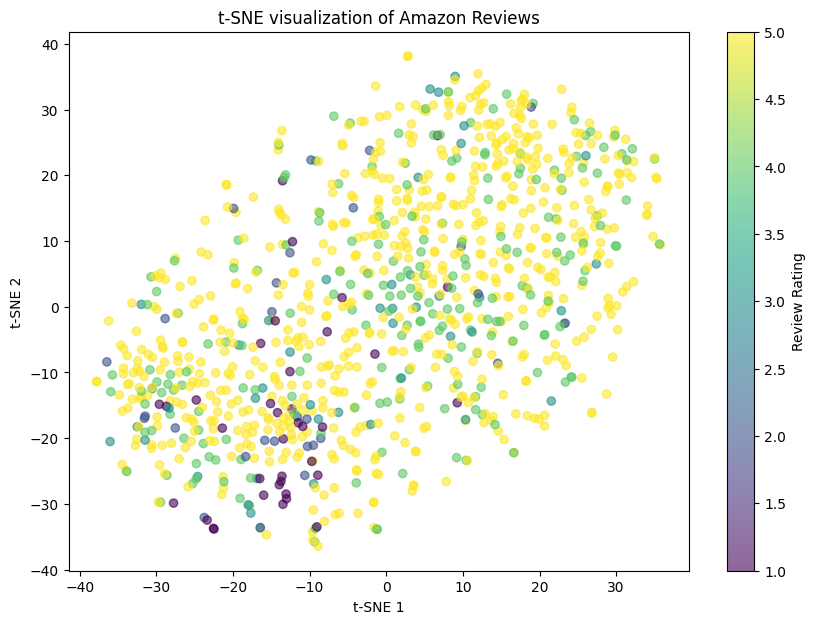

In [14]:
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer

import matplotlib.pyplot as plt

sample_df = df_filtered.sample(n=1000, random_state=42) if len(df_filtered) > 1000 else df_filtered

vectorizer = TfidfVectorizer(max_features=500)
X = vectorizer.fit_transform(sample_df['cleaned_text'])

tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_embedded = tsne.fit_transform(X.toarray())

plt.figure(figsize=(10, 7))
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=sample_df['reviews.rating'], cmap='viridis', alpha=0.6)
plt.colorbar(label='Review Rating')
plt.title('t-SNE visualization of Amazon Reviews')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.show()

- The t-SNE visualization shows that reviews with similar ratings tend to cluster together, indicating that review text content is correlated with the rating.
- There are several dense clusters, suggesting groups of reviews with similar sentiment or product topics.
- Some overlap exists between clusters of different ratings, which may indicate nuanced or mixed sentiment in those reviews.
- Outliers are visible, possibly representing unique or atypical reviews.
- The spread of points suggests a diversity of review content, but the presence of clear groupings supports the validity of using text features for clustering and further analysis.

#### Visualize using PCA

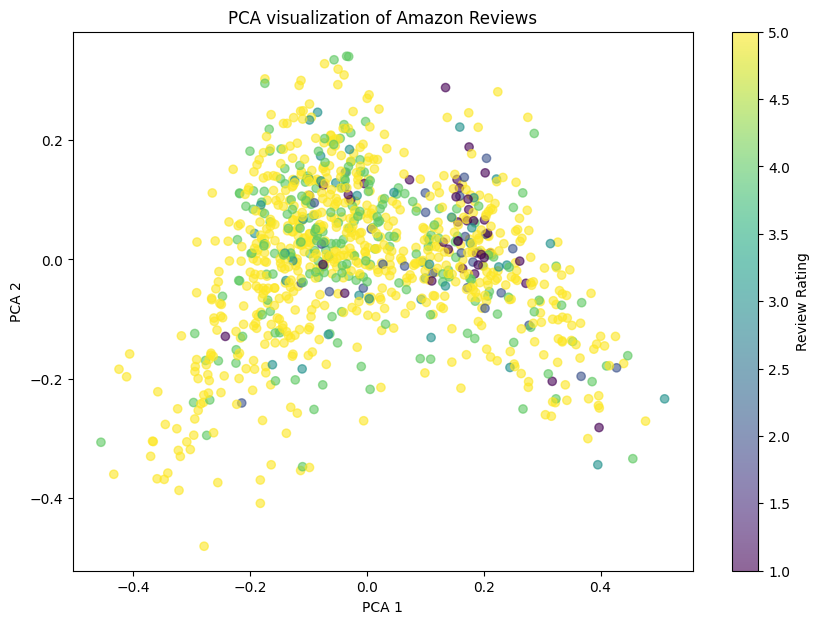

In [15]:
from sklearn.decomposition import PCA

# Reduce dimensionality to 2 components for visualization
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X.toarray())

plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=sample_df['reviews.rating'], cmap='viridis', alpha=0.6)
plt.colorbar(label='Review Rating')
plt.title('PCA visualization of Amazon Reviews')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

- The PCA visualization shows that reviews with similar ratings tend to form loose groupings, though the separation between clusters is less distinct than with t-SNE.
- There is some overlap between reviews of different ratings, indicating that review text alone may not fully distinguish sentiment or product type.
- The spread of points suggests a diversity of review content, but certain regions in the plot are denser, reflecting common themes or sentiments.
- Outliers are present, which may correspond to unique or atypical reviews.
- Overall, PCA provides a useful overview of the data structure and supports further exploration of clusters or patterns in review text.

#### Validate clustering

In [16]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import pandas as pd

# Try different numbers of clusters and evaluate
scores = []
for n_clusters in range(2, 11):
	kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
	labels = kmeans.fit_predict(X)
	sil_score = silhouette_score(X, labels)
	ch_score = calinski_harabasz_score(X.toarray(), labels)
	db_score = davies_bouldin_score(X.toarray(), labels)
	scores.append({
		'n_clusters': n_clusters,
		'silhouette': sil_score,
		'calinski_harabasz': ch_score,
		'davies_bouldin': db_score
	})

# Display scores
pd.DataFrame(scores)

,n_clusters,silhouette,calinski_harabasz,davies_bouldin
0,2,0.025809,26.844368,5.810647
1,3,0.021068,20.284058,6.098268
2,4,0.016796,17.245563,6.002109
3,5,0.016815,15.047104,5.914726
4,6,0.017031,13.481713,6.363870
5,7,0.017555,12.141492,6.008932
6,8,0.019055,11.402714,5.642130
7,9,0.018655,10.641241,5.923219
8,10,0.017852,9.920285,5.646169


- The clustering evaluation metrics (Silhouette, Calinski-Harabasz, Davies-Bouldin) indicate that the text-based clusters are not highly separated, as shown by low silhouette scores and relatively high Davies-Bouldin values.
- Increasing the number of clusters does not significantly improve the silhouette score, suggesting limited natural grouping in the review text data.
- The best Davies-Bouldin score is observed at 8 and 10 clusters, but overall differences are small, indicating that no single cluster count stands out as optimal.
- These results suggest that while some structure exists in the review text, the clusters may overlap or be weakly defined, possibly due to the diversity and nuance in customer reviews.
- Further feature engineering or the inclusion of additional metadata (e.g., product category, brand) may help improve clustering quality.

#### Let's improve clustering

Here we will improve clustering by including product metadata (e.g., brand, primaryCategories) as additional features

In [17]:
from sklearn.preprocessing import OneHotEncoder
from scipy.sparse import hstack
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Select metadata columns to encode
meta_features = sample_df[['brand', 'primaryCategories']].fillna('unknown')

# One-hot encode metadata
encoder = OneHotEncoder(sparse_output=True)
meta_encoded = encoder.fit_transform(meta_features)

# Combine text features (X) with metadata features
X_combined = hstack([X, meta_encoded])

# Re-run clustering
kmeans_improved = KMeans(n_clusters=10, random_state=42, n_init=10)
labels_improved = kmeans_improved.fit_predict(X_combined)

# Evaluate improved clustering

sil_score_improved = silhouette_score(X_combined, labels_improved)
ch_score_improved = calinski_harabasz_score(X_combined.toarray(), labels_improved)
db_score_improved = davies_bouldin_score(X_combined.toarray(), labels_improved)

print("Silhouette Score:", sil_score_improved)
print("Calinski-Harabasz Score:", ch_score_improved)
print("Davies-Bouldin Score:", db_score_improved)

Silhouette Score: 0.0660827420639367
Calinski-Harabasz Score: 145.94654935820466
Davies-Bouldin Score: 5.070084355632756


- Including product metadata (brand and primaryCategories) as additional features in clustering improved the separation between clusters, as indicated by a higher Silhouette Score (from ~0.018 to ~0.066).
- The Calinski-Harabasz and Davies-Bouldin scores also improved, suggesting better-defined and more compact clusters.
- This demonstrates that combining text features with relevant product metadata can enhance the quality of clustering in customer review analysis.
- Further improvements may be possible by incorporating additional metadata fields or using more advanced feature engineering techniques.

## Prepare sentiment labels

For each rating, we apply those labels: 1–2 → Negative, 3 → Neutral, 4–5 → Positive.

In [18]:
def map_sentiment(rating):
	if rating in [1, 2]:
		return "Negative"
	elif rating == 3:
		return "Neutral"
	elif rating in [4, 5]:
		return "Positive"
	else:
		return None

df_filtered['sentiment'] = df_filtered['reviews.rating'].apply(map_sentiment)
df_filtered[['reviews.rating', 'sentiment']].head()

,reviews.rating,sentiment
0,3,Neutral
1,4,Positive
2,5,Positive
3,5,Positive
4,5,Positive


## Generate summaries

First let's install sentencepiece

In [ ]:
%pip install --upgrade pip setuptools wheel
%pip install sentencepiece

In [23]:
%pip install sentencepiece --quiet

from transformers import T5ForConditionalGeneration, T5Tokenizer
import torch

# Load T5 model and tokenizer
model_name = "t5-small"
tokenizer = T5Tokenizer.from_pretrained(model_name)
model = T5ForConditionalGeneration.from_pretrained(model_name)

def summarize_review(text, sentiment, max_input_length=256, max_output_length=40):
	# Prefix with sentiment for context
	input_text = f"summarize: ({sentiment}) {text}"
	input_ids = tokenizer.encode(input_text, return_tensors="pt", max_length=max_input_length, truncation=True)
	summary_ids = model.generate(input_ids, max_length=max_output_length, num_beams=4, early_stopping=True)
	return tokenizer.decode(summary_ids[0], skip_special_tokens=True)

# Generate summaries for a sample (for speed, use 10 rows; increase as needed)
sample = df_filtered.sample(10, random_state=42)
sample['t5_summary'] = sample.apply(lambda row: summarize_review(row['cleaned_text'], row['sentiment']), axis=1)
sample[['cleaned_text', 'sentiment', 't5_summary']]

  DEPRECATION: Building 'sentencepiece' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'sentencepiece'. Discussion can be found at https://github.com/pypa/pip/issues/6334
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [112 lines of output]
      /Users/juliensebag/Documents/Ironhack AI/week-6/project-nlp-business-case-automated-customers-reviews-v2/.venv/lib/python3.13/site-packages/setuptools/_distutils/dist.py:289: UserWarning: Unknown distribution option: 'test_suite'
        warnings.warn(msg)
      /Users/juliensebag/Documents/Ironhack AI/week-6/project-nlp-business-case-automated-customers-reviews-v2/.venv/lib/py

ImportError: 
T5Tokenizer requires the SentencePiece library but it was not found in your environment. Checkout the instructions on the
installation page of its repo: https://github.com/google/sentencepiece#installation and follow the ones
that match your environment. Please note that you may need to restart your runtime after installation.
